In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import scipy.interpolate as interp
import pandas as pd
# ensure the notebook generate the same randomess
np.random.seed(1)


In [53]:
def bet_Bayes_Nash(N, vi):
    return (N-1)/N*vi

In [54]:
def bet_random(v):
    return np.random.uniform(0,v)

In [16]:
N = 2
R = [10**3,10**5, 10**7]


### Gdy wszyscy gracze przyjmują jako strategię równowagę Bayesa-Nasha

In [17]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(N,r))
    b =  bet_Bayes_Nash(N,v)

    x=np.argmax(b, axis=0)
    Welf = v[x, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA.append(np.mean(Welf/Opt))
print(R)
print(PoA)
pd.DataFrame({"R":R, 'PoA':PoA})

[1000, 100000, 10000000]
[1.0, 1.0, 1.0]


,R,PoA
0,1000,1.0
1,100000,1.0
2,10000000,1.0


### Gdy oferty są losowe

In [127]:
N = 2
R = [10, 10**3,10**5, 10**7]

In [128]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(N,r))
    b =  bet_random(v)

    x=np.argmax(b, axis=0)
    Welf = v[x, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA.append(np.mean(Welf/Opt))

pd.DataFrame({"R":R, 'PoA':PoA})

,R,PoA
0,10,0.949674
1,1000,0.922106
2,100000,0.917843
3,10000000,0.916749


In [129]:
n = 100
r = 50

In [130]:
PoA_mean = []
PoA_min = []
PoA_max = []

for N in range(1,n): 
    v = np.random.uniform(0,1,(N,r))
    b =  bet_random(v)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))
    PoA_max.append(max(PoA))



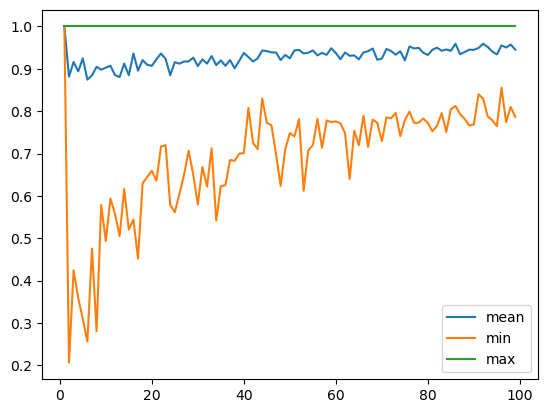

In [131]:
fig, ax = plt.subplots()
x = list(range(1,n))
ax.plot(x,PoA_mean, label = 'mean')
ax.plot(x,PoA_min, label = 'min')
ax.plot(x,PoA_max, label = 'max')
ax.legend()